In [7]:
!kaggle datasets download -d gopalbhattrai/pascal-voc-2012-dataset

Dataset URL: https://www.kaggle.com/datasets/gopalbhattrai/pascal-voc-2012-dataset
License(s): unknown
100% 3.51G/3.52G [00:57<00:00, 62.6MB/s]
100% 3.52G/3.52G [00:57<00:00, 66.0MB/s]


In [8]:
# prompt: exracr dataset

!unzip pascal-voc-2012-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: VOC2012_train_val/VOC2012_train_val/SegmentationClass/2008_001874.png  
  inflating: VOC2012_train_val/VOC2012_train_val/SegmentationClass/2008_001876.png  
  inflating: VOC2012_train_val/VOC2012_train_val/SegmentationClass/2008_001882.png  
  inflating: VOC2012_train_val/VOC2012_train_val/SegmentationClass/2008_001885.png  
  inflating: VOC2012_train_val/VOC2012_train_val/SegmentationClass/2008_001895.png  
  inflating: VOC2012_train_val/VOC2012_train_val/SegmentationClass/2008_001896.png  
  inflating: VOC2012_train_val/VOC2012_train_val/SegmentationClass/2008_001926.png  
  inflating: VOC2012_train_val/VOC2012_train_val/SegmentationClass/2008_001966.png  
  inflating: VOC2012_train_val/VOC2012_train_val/SegmentationClass/2008_001971.png  
  inflating: VOC2012_train_val/VOC2012_train_val/SegmentationClass/2008_001992.png  
  inflating: VOC2012_train_val/VOC2012_train_val/SegmentationClass/2008_001997.png  
  inflating: V

In [5]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
import cv2

In [ ]:
class LightweightSegmenter:
    def __init__(self):
        """
        Initialize lightweight segmentation model
        """
        # Load MobileNetV3-based DeepLabV3 (lighter model)
        self.model = torchvision.models.segmentation.deeplabv3_mobilenet_v3_large(
            pretrained=True,
            progress=True
        )
        self.model.eval()

        # COCO classes (reduced subset)
        self.CLASSES = [
            'background', 'person', 'car', 'dog', 'cat',
            'bicycle', 'chair', 'dining table', 'tv'
        ]

        # Color palette
        self.PALETTE = plt.cm.get_cmap('Set1')(np.linspace(0, 1, len(self.CLASSES)))[:, :3]

    def preprocess_image(self, image_path):
        """
        Preprocess input image
        """
        input_image = Image.open(image_path).convert("RGB")
        preprocess = transforms.Compose([
            transforms.Resize((256, 256)),  # Smaller size for Colab
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]
            )
        ])

        input_tensor = preprocess(input_image)
        return input_tensor.unsqueeze(0), input_image

    def segment_image(self, image_path):
        """
        Perform lightweight image segmentation
        """
        input_tensor, original_image = self.preprocess_image(image_path)

        with torch.no_grad():
            output = self.model(input_tensor)['out'][0]

        output_predictions = output.argmax(0)
        return output_predictions.numpy(), original_image

    def visualize_segmentation(self, image_path):
        """
        Visualize segmentation results
        """
        seg_mask, original_image = self.segment_image(image_path)

        plt.figure(figsize=(15, 5))

        # Original Image
        plt.subplot(1, 3, 1)
        plt.title('Original')
        plt.imshow(original_image)
        plt.axis('off')

        # Segmentation Mask
        plt.subplot(1, 3, 2)
        plt.title('Segmentation')
        # Clip seg_mask values to the valid range of the palette
        seg_mask_clipped = np.clip(seg_mask, 0, len(self.PALETTE) - 1)
        colored_seg_mask = self.PALETTE[seg_mask_clipped]
        plt.imshow(colored_seg_mask)
        plt.axis('off')

        # Overlay
        plt.subplot(1, 3, 3)
        plt.title('Overlay')

        # Resize colored_seg_mask to match original_image dimensions
        colored_seg_mask_resized = cv2.resize(colored_seg_mask, (original_image.width, original_image.height))

        overlay = 0.5 * np.array(original_image) + 0.5 * colored_seg_mask_resized
        plt.imshow(overlay.astype(np.uint8))
        plt.axis('off')

        plt.tight_layout()
        plt.show()

<ipython-input-6-77a8022f88da>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.PALETTE = plt.cm.get_cmap('Set1')(np.linspace(0, 1, len(self.CLASSES)))[:, :3]


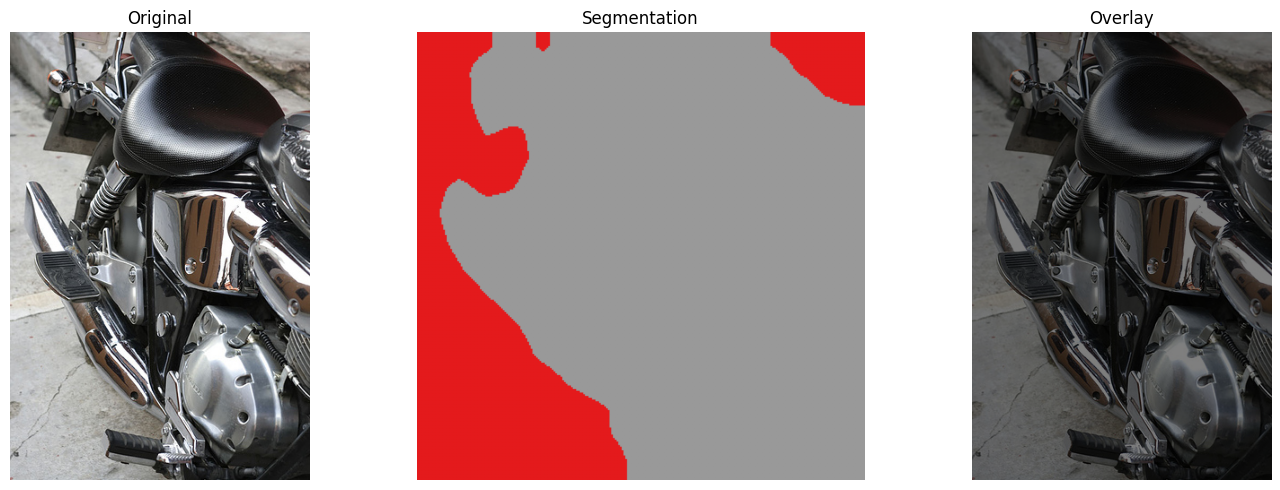

In [9]:
def colab_segment_example(image_path):
    # Create segmenter and process image
    segmenter = LightweightSegmenter()
    segmenter.visualize_segmentation(image_path)

# Now you can call it with the path to an image from your test set
image_from_test_set = '/content/VOC2012_test/VOC2012_test/JPEGImages/2008_000001.jpg'
colab_segment_example(image_from_test_set)

<ipython-input-6-77a8022f88da>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.PALETTE = plt.cm.get_cmap('Set1')(np.linspace(0, 1, len(self.CLASSES)))[:, :3]


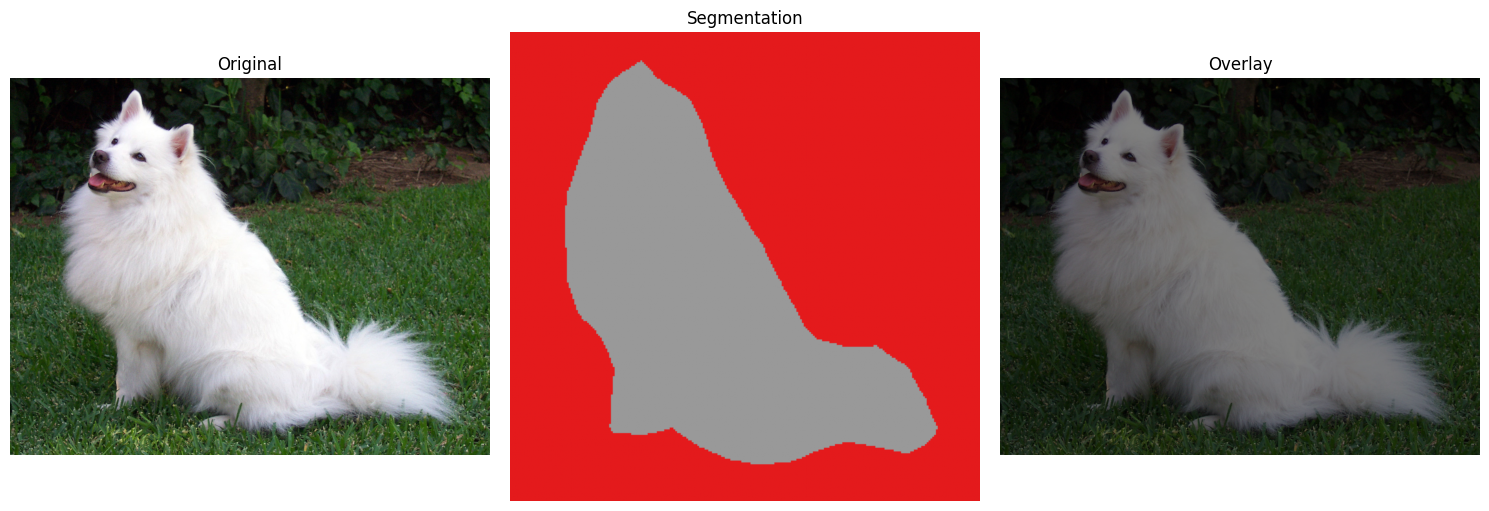

In [11]:
image_from_test_set = '/content/sample_image.jpg'
colab_segment_example(image_from_test_set)